<a href="https://colab.research.google.com/github/gago27/matplotlib/blob/master/Matplotlib_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

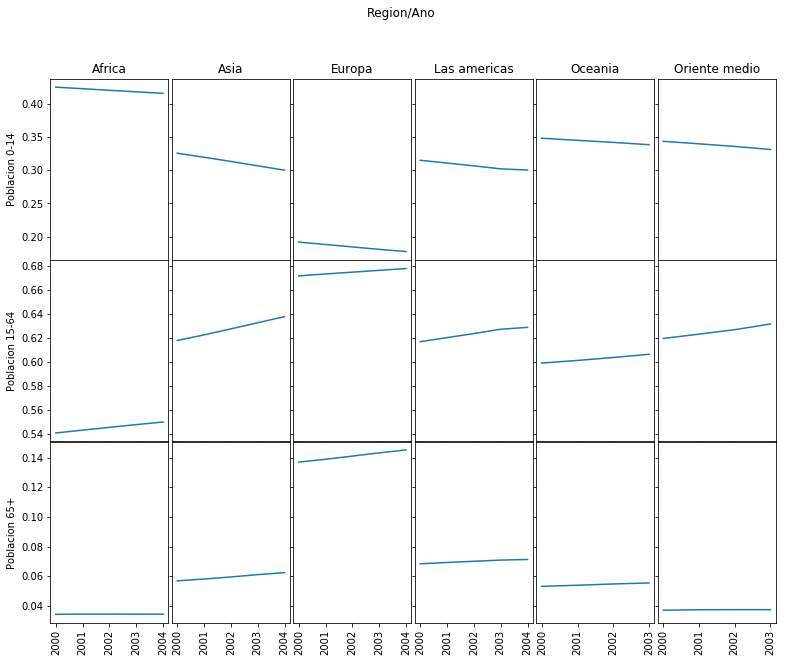

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
archivo = pd.read_csv('indicadores-mundiales.csv',
                     sep= ',',
                     encoding = 'latin-1')
archivo['Ano'] = archivo['Ano'].map(lambda x: x[:4])
archivo['Region'] = archivo['Region'].map(lambda x: x.capitalize())
p14 = archivo[['Poblacion 0-14', 'Ano', 'Region']]
p14_ = p14.groupby(['Region', 'Ano']).mean()[['Poblacion 0-14']]
p14_['Poblacion']= p14_['Poblacion 0-14'].map(lambda x: x/100)
p64 = archivo[['Poblacion 15-64', 'Ano', 'Region']]
p64_ = p64.groupby(['Region', 'Ano']).mean()[['Poblacion 15-64']]
p64_['Poblacion']= p64_['Poblacion 15-64'].map(lambda x: x/100)
p65 = archivo[['Poblacion 65+', 'Ano', 'Region']]
p65_ = p65.groupby(['Region', 'Ano']).mean()[['Poblacion 65+']]
p65_['Poblacion']= p65_['Poblacion 65+'].map(lambda x: x/100)
fig, axs = plt.subplots(3, 6, sharex = 'col', sharey= 'row', figsize = (13, 10))
plt.suptitle('Region/Ano')
plt.subplots_adjust(hspace = 0.003, wspace= 0.03 )
poblacion = [p14_, p64_, p65_]
for j,  people in enumerate(poblacion):
  continentes = people.index.levels[0]
  anos = people.index.levels[1]
  for m, continente in enumerate(continentes):
    if 3< m :
      z = 20+(m-3)*4
      k = 20 +(m-4)*4
      p = people[k:z]
      axs[j][m].plot(anos[:-1], p['Poblacion'])
      axs[2][m].set_xticklabels(anos[:-1], rotation = 'vertical')
    elif m < 4:
      z = (m+1)*5
      k = m*5
      p = people[k:z]
      axs[j][m].plot(anos, p['Poblacion'])
      axs[2][m].set_xticklabels(anos, rotation = 'vertical')

    axs[0][m].set_title(continente)
  axs[j][0].set_ylabel(people.columns[0])